<a href="https://colab.research.google.com/github/AnnaKul5/Computer-vision-basics/blob/main/ComputerVisionLab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Написать функцию, реализующую свёрточный слой через im2col

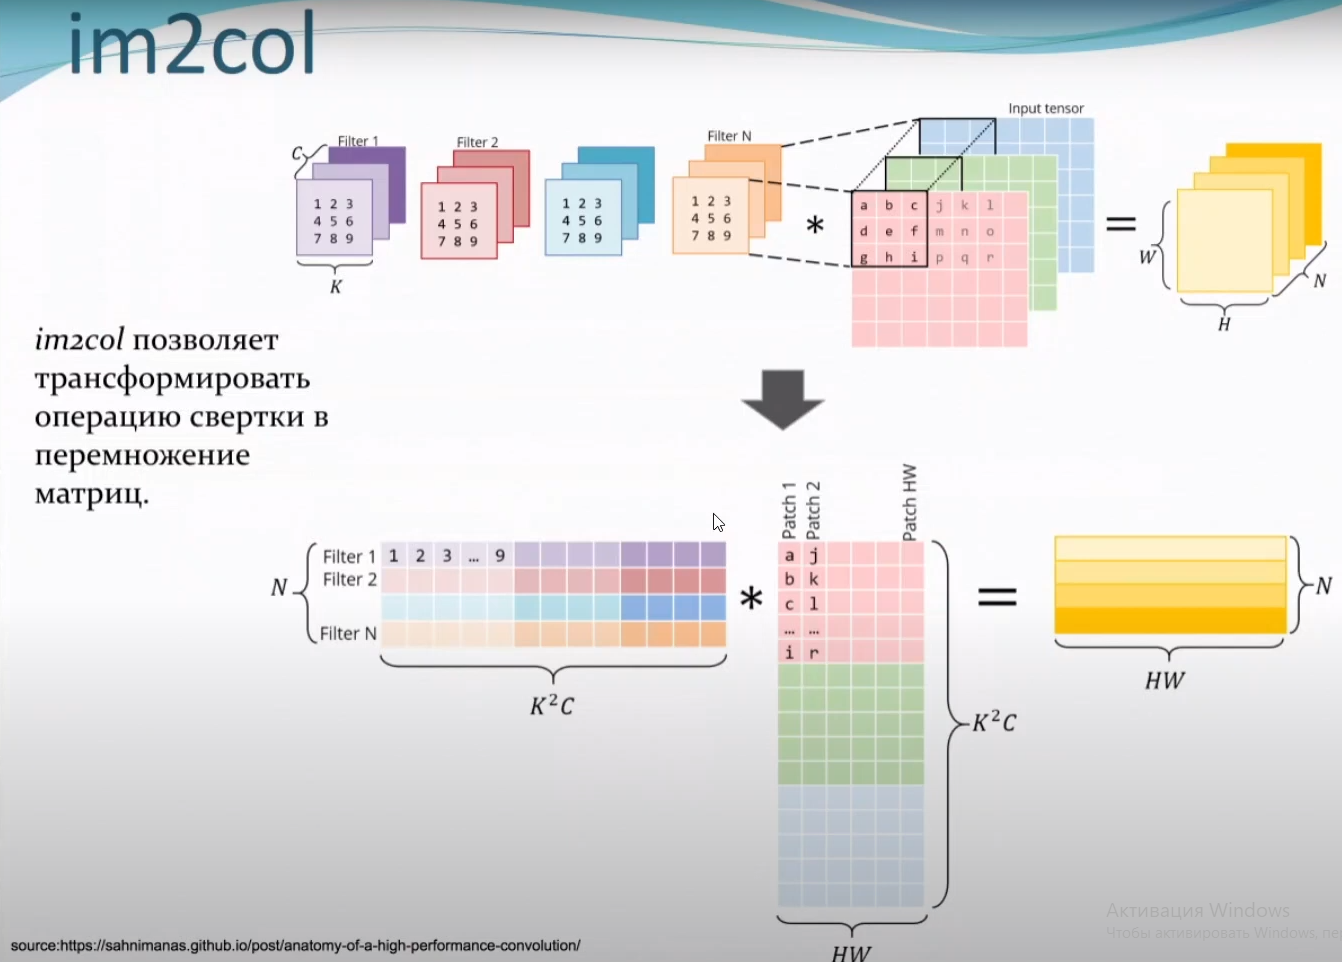

In [ ]:
import numpy as np

def im2col(input_data, filter_shape = None):
    # если в функцию не был передан размер фильтра, то возвращаем input_data в виде строки
    if filter_shape is None:
        return input_data.flatten()

    filter_h = filter_shape[0]
    filter_w = filter_shape[1]
    c = 1
    if len(filter_shape) != 2:
        c = filter_shape[2]

    input_data_h = input_data.shape[0]
    input_data_w = input_data.shape[1]
    h, w = (input_data_h - filter_h + 1, input_data_w - filter_w + 1)
    res = np.empty((h * w, filter_h * filter_w * c))

    for y in range(h):
        for x in range(w):
            res[y * w + x] = np.reshape(input_data[y: y+filter_h, x: x+filter_w], (filter_h * filter_w * c))

    return res.T

In [ ]:
#массив данных для примера
Arr1 = np.arange(25).reshape((5, 5))
print(Arr1)
print(Arr1.shape)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
(5, 5)


In [ ]:
#ядро фильтра
ker1 = np.array([[0, 1, 0],
              [1, 0, -1],
              [0, -1, 0]])
print(ker1)
print(ker1.shape)

[[ 0  1  0]
 [ 1  0 -1]
 [ 0 -1  0]]
(3, 3)


In [ ]:
#массив данных с 3 размерностями
Arr2 = np.ones((3, 3, 2))
print(Arr2)
print(Arr2.shape)

[[[1. 1.]
  [1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]
  [1. 1.]]]
(3, 3, 2)


In [ ]:
#ядро фильтра с 3 размерностями
ker2 = np.stack((
    [[1,0], [0, 0]],
    [[0, 0], [0, 1]]
    ))
print(ker2)
print(ker2.shape)

[[[1 0]
  [0 0]]

 [[0 0]
  [0 1]]]
(2, 2, 2)


In [ ]:
#преобразуем ядро фильтра в строку
ker = im2col(ker1)
print(ker)
print(ker.shape)

[ 0  1  0  1  0 -1  0 -1  0]
(9,)


In [ ]:
Arr = im2col(Arr1, ker1.shape)
print(Arr)
print(Arr.shape)

[[ 0.  1.  2.  5.  6.  7. 10. 11. 12.]
 [ 1.  2.  3.  6.  7.  8. 11. 12. 13.]
 [ 2.  3.  4.  7.  8.  9. 12. 13. 14.]
 [ 5.  6.  7. 10. 11. 12. 15. 16. 17.]
 [ 6.  7.  8. 11. 12. 13. 16. 17. 18.]
 [ 7.  8.  9. 12. 13. 14. 17. 18. 19.]
 [10. 11. 12. 15. 16. 17. 20. 21. 22.]
 [11. 12. 13. 16. 17. 18. 21. 22. 23.]
 [12. 13. 14. 17. 18. 19. 22. 23. 24.]]
(9, 9)


In [ ]:
print(Arr2.shape)
print(ker2.shape)
# Размер результата свёртки = (2, 2, 2) (ниже в примере с помощью прямой реализации свёртки)
# После применения im2col(Arr2) размер итоговой свёртки - это площадь ядра * глубину, второе значение - размер итогового изображения 2х2 = (filter_w * filter_h * c, 2*2) = (2*2*2, 2*2) = (8, 4)
print(im2col(Arr2, ker2.shape))
print(im2col(Arr2, ker2.shape).shape)

(3, 3, 2)
(2, 2, 2)
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
(8, 4)


#2. Сделать проверку результата с помощью прямой реализации свёртки

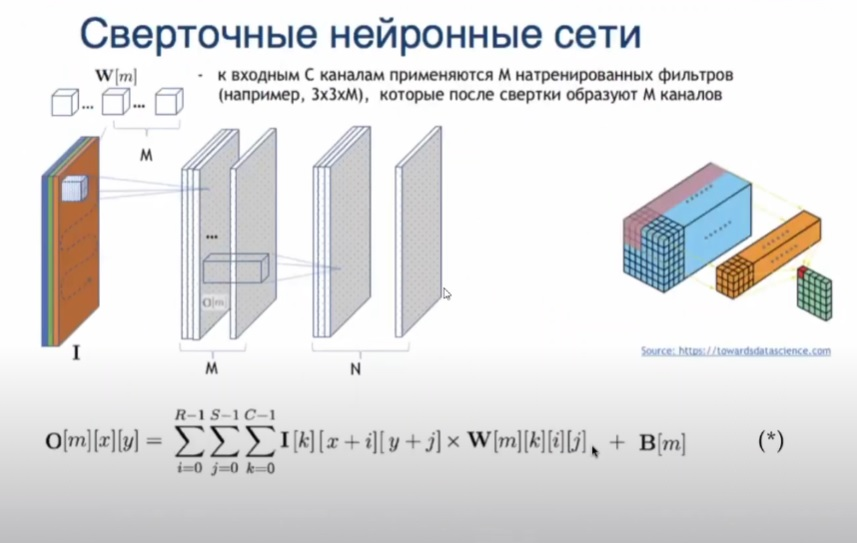

In [ ]:
def convolution_direct(input_data, filter, c=1):
    filter_h = filter.shape[0]
    filter_w = filter.shape[1]
    input_data_h = input_data.shape[0]
    input_data_w = input_data.shape[1]
    h, w = (input_data_h - filter_h + 1, input_data_w - filter_w + 1)

    out = np.zeros((h, w))
    if c != 1:
        out = np.zeros((h, w, c))

    for y in range(h):
        for x in range(w):
            for i in range(filter_h):
                for j in range(filter_w):
                    if c == 1:
                        out[y][x] += input_data[y+i][x+j] * filter[i][j]
                    else:
                        for m in range(c):
                            out[y][x][m] += input_data[y+i][x+j][m] * filter[i][j][m]

    return out

In [ ]:
#Выведем результат свёртки и его размерность
res_direct = convolution_direct(Arr1, ker1, c=1)
print(res_direct.shape)
print(res_direct)

(3, 3)
[[-12. -12. -12.]
 [-12. -12. -12.]
 [-12. -12. -12.]]


In [ ]:
#Выведем результат свёртки и его размерность
res_direct = convolution_direct(Arr2, ker2, c=2)
print(res_direct.shape)
print(res_direct)

(2, 2, 2)
[[[1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]]]
